# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
#libraries

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
import math

## Data Understanding

In [2]:
#hp_df - housing_prediction_dataframe
hp_df=pd.read_csv("train.csv")

In [3]:
hp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
hp_df.shape

(1460, 81)

In [5]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hp_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
hp_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
pd.set_option('display.max_rows', 100)

In [9]:
hp_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preparation 

In [10]:
# Count the number of missing values in each column and sort in descending order
total_missing = hp_df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values in each column and sort in descending order
percent_missing = (100 * hp_df.isnull().sum() / hp_df.shape[0]).sort_values(ascending=False)

# Combine the total and percentage missing values into a DataFrame
missing_values_df = pd.concat([total_missing, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

# Display missing values DataFrame
print(f"Missing values summary (first {missing_values_df.shape[0]} columns):\n{missing_values_df}")


Missing values summary (first 81 columns):
               Total missing  Percent missing
PoolQC                  1453        99.520548
MiscFeature             1406        96.301370
Alley                   1369        93.767123
Fence                   1179        80.753425
FireplaceQu              690        47.260274
LotFrontage              259        17.739726
GarageYrBlt               81         5.547945
GarageCond                81         5.547945
GarageType                81         5.547945
GarageFinish              81         5.547945
GarageQual                81         5.547945
BsmtFinType2              38         2.602740
BsmtExposure              38         2.602740
BsmtQual                  37         2.534247
BsmtCond                  37         2.534247
BsmtFinType1              37         2.534247
MasVnrArea                 8         0.547945
MasVnrType                 8         0.547945
Electrical                 1         0.068493
Id                         0         

In [11]:
percent_missing

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [12]:
# Count the number of columns with more than 20% missing values
num_missing_cols = (percent_missing > 20).sum()

# Print the result
print(f"{num_missing_cols} columns have more than 20% missing data.")


5 columns have more than 20% missing data.


In [13]:
# Select columns with less than 20% missing data
selected_columns = percent_missing[percent_missing < 20].index

# Create the cleaned DataFrame with selected columns
hp_df_cleaned = hp_df[selected_columns].copy()

# Print the shape of the cleaned DataFrame
print(f"Shape of cleaned DataFrame: {hp_df_cleaned.shape}")


Shape of cleaned DataFrame: (1460, 76)


In [14]:
hp_df_cleaned

,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,65.0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,...,150,706,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,208500
1,80.0,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,...,284,978,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg,181500
2,68.0,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,...,434,486,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,223500
3,60.0,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,...,540,216,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,140000
4,84.0,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,...,490,655,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,...,953,0,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg,175000
1456,85.0,1978.0,TA,Attchd,Unf,TA,Rec,No,Gd,TA,...,589,790,Gable,CBlock,TA,TA,Plywood,Plywood,CompShg,210000
1457,66.0,1941.0,TA,Attchd,RFn,TA,Unf,No,TA,Gd,...,877,275,Gable,Stone,Gd,Ex,CmentBd,CemntBd,CompShg,266500
1458,68.0,1950.0,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,...,0,49,Hip,CBlock,TA,TA,MetalSd,MetalSd,CompShg,142125


In [15]:
# Count the number of unique values in each column of the cleaned DataFrame
unique_counts = hp_df_cleaned.nunique()

# Print the result
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
LotFrontage       110
GarageYrBlt        97
GarageCond          5
GarageType          6
GarageFinish        3
GarageQual          5
BsmtFinType2        6
BsmtExposure        4
BsmtQual            4
BsmtCond            4
BsmtFinType1        6
MasVnrArea        327
MasVnrType          4
Electrical          5
Id               1460
Functional          7
Fireplaces          4
KitchenQual         4
KitchenAbvGr        4
BedroomAbvGr        8
HalfBath            3
FullBath            4
BsmtHalfBath        3
TotRmsAbvGrd       12
GarageCars          5
GrLivArea         861
GarageArea        441
PavedDrive          3
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
BsmtFullBath        4
HeatingQC           5
LowQualFinSF       24
LandSlope           3
OverallQual   

In [16]:
# Loop over each column of the cleaned DataFrame and print the value counts
for col in hp_df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(hp_df_cleaned[col].value_counts())
    print()

Value counts for LotFrontage:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

Value counts for GarageYrBlt:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0    

### Handling missing values in cateorical columns

In [17]:
# Get the list of Categorical column
object_cols = list(hp_df_cleaned.select_dtypes(include=['object']).columns)

# Print the list of categorical columns
print("Categorical columns:")
print(object_cols)

Categorical columns:
['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'HeatingQC', 'LandSlope', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning', 'CentralAir', 'Heating', 'RoofStyle', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl']


In [18]:
print(len(object_cols))


38


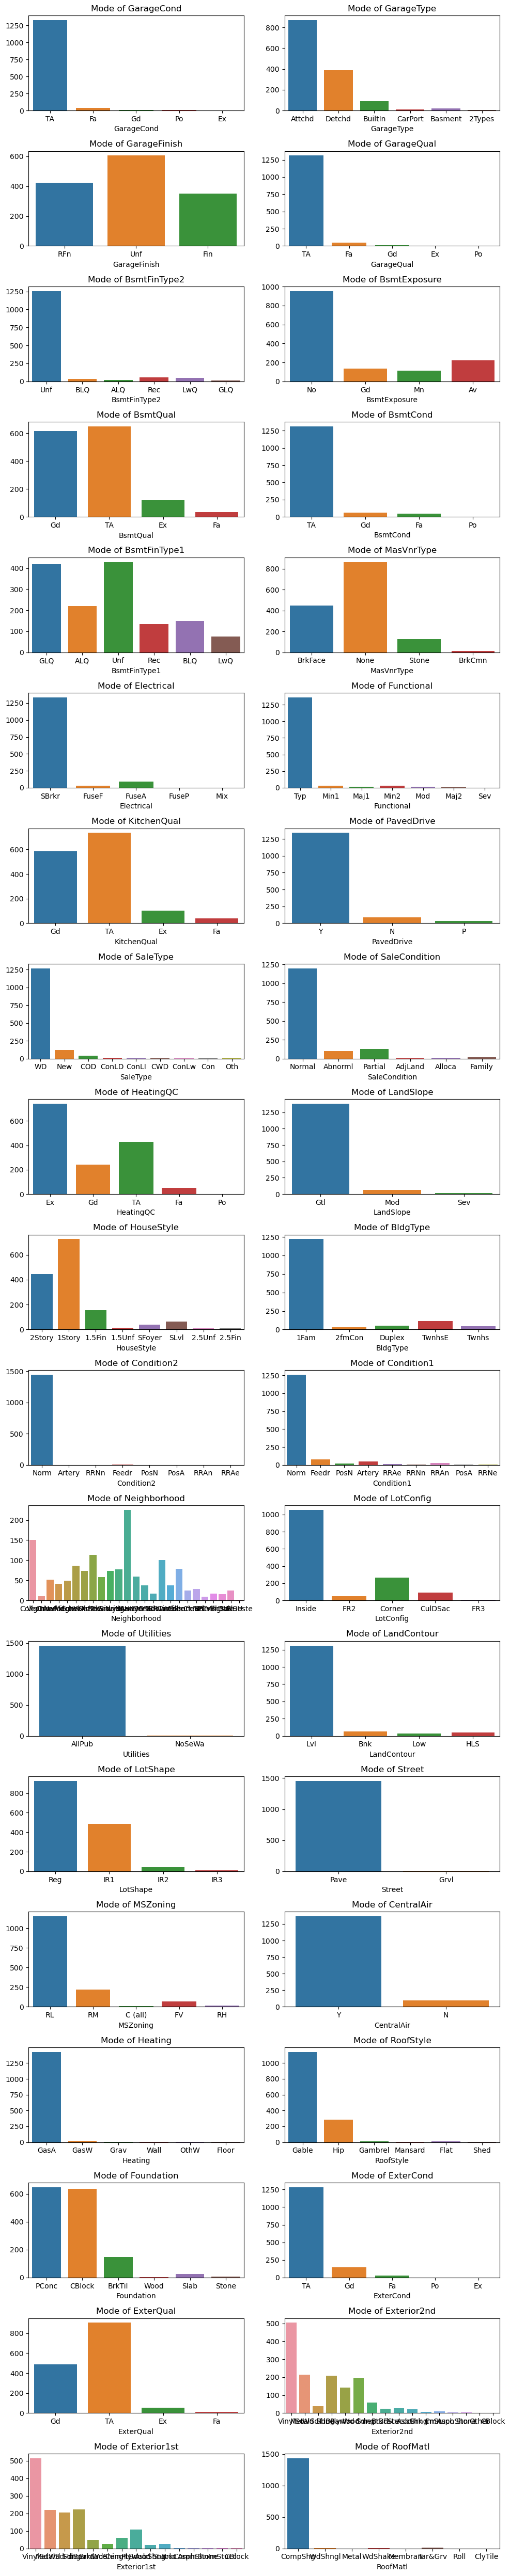

In [19]:
# Get the list of categorical columns
object_cols = list(hp_df_cleaned.select_dtypes(include=['object']).columns)

# Calculate the number of rows and columns for the grid
nrows = 19
ncols = 2

# Calculate the total number of plots to be created
nplots = len(object_cols)

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 50))

axes = axes.flatten()

# Loop over each categorical column and plot the mode on a subplot
for i, col in enumerate(object_cols):
    # Plot the mode of the column on a subplot
    sns.countplot(hp_df_cleaned[col], ax=axes[i])
    axes[i].set_title(f"Mode of {col}")
    
    # Hide the y-axis label for better visualization
    axes[i].set_ylabel('')
    
# Hide the remaining subplots
for j in range(i+1, nrows*ncols):
    axes[j].axis('off')

# Adjust the spacing of the subplots
fig.tight_layout()

# Show the plot
plt.show()


In [20]:
hp_df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [21]:
# Impute missing values in 'GarageCond' with the mode (i.e., 'TA')
mode_GarageCond = hp_df_cleaned['GarageCond'].mode()[0]
hp_df_cleaned['GarageCond'] = hp_df_cleaned['GarageCond'].fillna(mode_GarageCond)

In [22]:
hp_df_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [23]:
hp_df_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
# Impute missing values in 'GarageType' with the mode (i.e., 'ATTCHD')
mode_GarageType = hp_df_cleaned['GarageType'].mode()[0]
hp_df_cleaned['GarageType'] = hp_df_cleaned['GarageType'].fillna(mode_GarageType)

In [25]:
hp_df_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
hp_df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [27]:
# Impute missing values in 'GarageFinish' with a new category 'Unknown'
hp_df_cleaned['GarageFinish'] = hp_df_cleaned['GarageFinish'].fillna('Unknown')

In [28]:
hp_df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

In [29]:
hp_df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [30]:
# Impute missing values in 'GarageQual' with the mode (i.e., 'TA')
mode_GarageQual = hp_df_cleaned['GarageQual'].mode()[0]
hp_df_cleaned['GarageQual'] = hp_df_cleaned['GarageQual'].fillna(mode_GarageQual)

In [31]:
hp_df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

### Handling missing values in Numerical columns